In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
df = pd.read_csv('US_Accidents_June20.csv',index_col='ID',parse_dates=['Start_Time','End_Time'])

In [3]:
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.weekday
df['Day'] = df['Start_Time'].dt.day
df['Impact'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds()/60
df["ds"] = df["Start_Time"].dt.date
#YMD
df['y'] = df['Severity']

In [4]:
one_week = 60*24*7
df_clean = df[(df['Impact']>0) & (df['Impact']< one_week)].drop_duplicates(subset=['Start_Time',
                                                                                   'End_Time',
                                                                                   'City',
                                                                                  'Street',
                                                                                   'Number',
                                                                                   'Description'])


In [5]:
df1 = df_clean[['ds',
                'y']]


In [6]:
MA_df = df1[df["State"] == "MA"]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [7]:
df1.tail()

,ds,y
ID,,
A-3513776,2019-08-23,2
A-3513777,2019-08-23,2
A-3513778,2019-08-23,2
A-3513779,2019-08-23,2
A-3513780,2019-08-23,2


In [8]:
MA_df.tail()

,ds,y
ID,,
A-3512289,2019-08-21,2
A-3512823,2019-08-22,2
A-3513364,2019-08-23,2
A-3513370,2019-08-23,2
A-3513380,2019-08-23,2


# Forecasting

In [9]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True, interval_width=0.95)
m.fit(MA_df)

In [10]:
future = m.make_future_dataframe(periods=365)

In [11]:
future.tail()
#future.head()

,ds
1832,2021-06-26
1833,2021-06-27
1834,2021-06-28
1835,2021-06-29
1836,2021-06-30


In [12]:
forecast = m.predict(future)

In [13]:
forecast.tail()
#forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1832,2021-06-26,2.145528,1.453170,3.441705,2.076600,2.214126,0.318063,0.318063,0.318063,0.229919,...,0.050408,0.050408,0.050408,0.037737,0.037737,0.037737,0.0,0.0,0.0,2.463591
1833,2021-06-27,2.145492,1.359044,3.395116,2.076224,2.214448,0.300166,0.300166,0.300166,0.229919,...,0.032644,0.032644,0.032644,0.037604,0.037604,0.037604,0.0,0.0,0.0,2.445658
1834,2021-06-28,2.145456,1.357675,3.439132,2.075847,2.214773,0.244273,0.244273,0.244273,0.229919,...,-0.023248,-0.023248,-0.023248,0.037602,0.037602,0.037602,0.0,0.0,0.0,2.389729
1835,2021-06-29,2.145421,1.429643,3.422165,2.075471,2.215098,0.256978,0.256978,0.256978,0.229919,...,-0.010666,-0.010666,-0.010666,0.037725,0.037725,0.037725,0.0,0.0,0.0,2.402398
1836,2021-06-30,2.145385,1.456062,3.464192,2.075094,2.215423,0.248732,0.248732,0.248732,0.229919,...,-0.019144,-0.019144,-0.019144,0.037957,0.037957,0.037957,0.0,0.0,0.0,2.394117


In [14]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()
#forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
1832,2021-06-26,2.463591,1.453170,3.441705
1833,2021-06-27,2.445658,1.359044,3.395116
1834,2021-06-28,2.389729,1.357675,3.439132
1835,2021-06-29,2.402398,1.429643,3.422165
1836,2021-06-30,2.394117,1.456062,3.464192


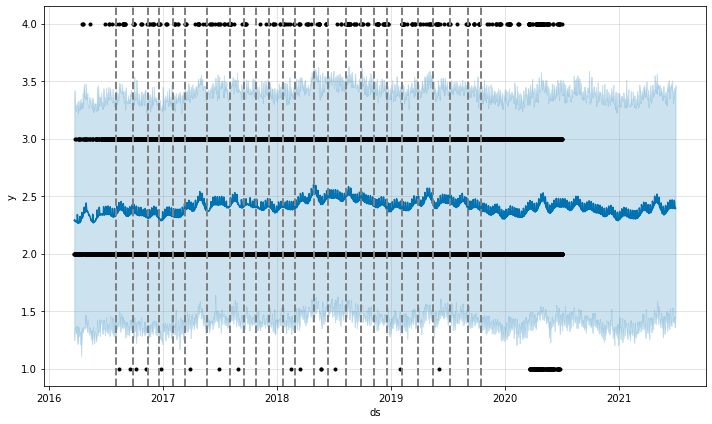

In [15]:
fig1 = m.plot(forecast)
for cp in m.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

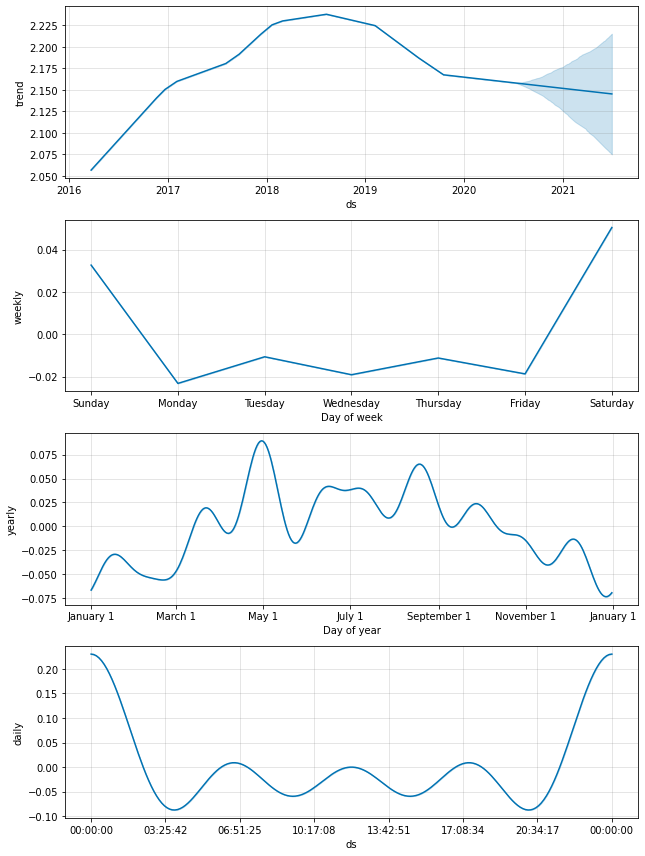

In [16]:
fig2 = m.plot_components(forecast)